In [1]:
#pip install git+https://github.com/mjkvaak/ImageDataAugmentor

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,filename,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14
0,05317.jpg,25,55,63,39,145,36,171,45,39,...,159,65,113,103,79,148,113,148,143,141
1,04767.jpg,17,32,39,27,56,22,81,16,20,...,86,28,56,66,45,80,59,80,74,76
2,05241.jpg,33,44,70,44,119,41,142,41,33,...,144,56,94,101,74,135,89,135,112,133
3,03849.jpg,96,157,222,143,389,129,517,125,153,...,467,188,328,339,241,451,335,453,419,441
4,00952.jpg,13,19,30,16,51,17,66,16,18,...,59,23,39,43,31,56,41,56,49,55


In [5]:
train.shape

(5000, 29)

filename содержит данные лицf, для которых 28 последующих столбцов представляют данные ключевых точек (14 х-координаты и 14 у-координаты). Попробуем обучить модель. Во-первых, давайте отобразим несколько лиц.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

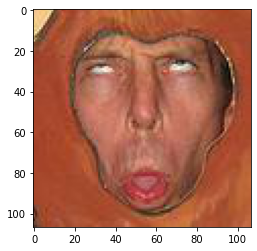

(107, 107)

In [7]:
image = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\02748.jpg')
imgplot = plt.imshow(image)
plt.show()
image.size

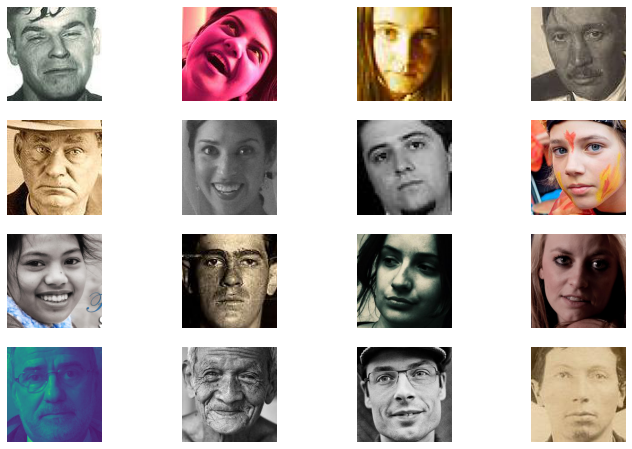

In [8]:
plt.figure(figsize=(12,8))
random_image = train.sample(n=16)
random_image_paths = random_image['filename'].values
for index, path in enumerate(random_image_paths):
    im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\' + path)
    plt.subplot(4,4, index+1)
    plt.imshow(im)
    plt.axis('off')
plt.show()

Давайте теперь добавим к этому рисунку отмеченные ключевые точки лица. Во-первых, давайте сделаем

In [9]:
keypoint_cols = list(train.columns)[1:]

In [10]:
xy = train.iloc[0][keypoint_cols].values.reshape((14, 2))
xy 

array([[25, 55],
       [63, 39],
       [145, 36],
       [171, 45],
       [39, 74],
       [61, 69],
       [79, 72],
       [130, 68],
       [145, 65],
       [159, 65],
       [113, 103],
       [79, 148],
       [113, 148],
       [143, 141]], dtype=object)

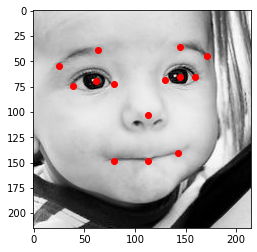

In [11]:
plt.plot(xy[:, 0], xy[:, 1], 'ro')
im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\' + train.iloc[0]['filename'])
plt.imshow(im, cmap='gray')

Теперь оценим их на разных фотографиях

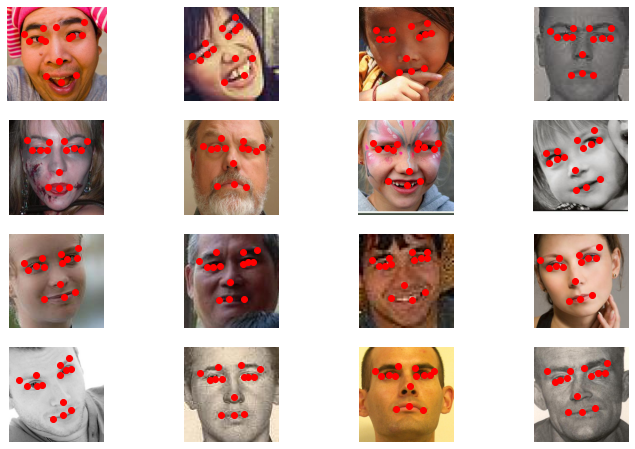

In [12]:
plt.figure(figsize=(12,8))
random_image = train.sample(n=16)
random_image_paths = random_image['filename'].values
keypoint_cols = list(random_image.columns)[1:]
keypoints = random_image[keypoint_cols]

for index, path in enumerate(random_image_paths):
    im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\' + path)
    xy = keypoints.iloc[index][keypoint_cols].values.reshape((14, 2))
    plt.subplot(4,4, index+1)
    plt.plot(xy[:, 0], xy[:, 1], 'ro')
    plt.imshow(im)
    plt.axis('off')
plt.show()

Из изображений рисунков можно сделать следующие выводы:

1. Некоторые изображения имеют высокое разрешение, некоторые - низкое
2. Некоторые изображения цветные, некоторые чернобелые
3. Разный угол повората лица
4. На изображении могут встречаться несколько лиц

Необходимо проанализировать статистику:

In [13]:
image_size_train = []
for path in train['filename']:
    im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\' + path)
    image_size_train.append(im.size)


In [14]:
image_size_train

[(215, 215),
 (112, 112),
 (195, 195),
 (645, 645),
 (80, 80),
 (613, 613),
 (200, 200),
 (119, 119),
 (928, 928),
 (240, 240),
 (1070, 1070),
 (180, 180),
 (137, 137),
 (239, 239),
 (796, 796),
 (165, 165),
 (544, 587),
 (216, 216),
 (785, 785),
 (170, 170),
 (402, 406),
 (257, 257),
 (424, 424),
 (113, 113),
 (271, 285),
 (152, 152),
 (1238, 1180),
 (45, 45),
 (177, 177),
 (371, 371),
 (175, 175),
 (1443, 1443),
 (120, 120),
 (124, 124),
 (263, 263),
 (145, 145),
 (126, 126),
 (232, 232),
 (187, 187),
 (255, 255),
 (706, 706),
 (205, 192),
 (142, 142),
 (172, 172),
 (54, 54),
 (64, 64),
 (236, 236),
 (146, 146),
 (735, 735),
 (572, 572),
 (66, 66),
 (126, 126),
 (124, 124),
 (1774, 1774),
 (1025, 1025),
 (1432, 1432),
 (185, 185),
 (314, 314),
 (86, 86),
 (228, 228),
 (144, 144),
 (174, 174),
 (697, 697),
 (125, 125),
 (154, 154),
 (55, 55),
 (145, 145),
 (216, 216),
 (303, 303),
 (2029, 2089),
 (52, 52),
 (1824, 1824),
 (145, 145),
 (209, 209),
 (780, 780),
 (122, 122),
 (228, 228),

In [15]:
import os

In [16]:
data_test = os.listdir('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\test\\')

In [17]:
image_size_test = []
for path in data_test:
    im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\test\\' + path)
    image_size_test.append(im.size)

In [18]:
image_size_test

[(81, 81),
 (229, 229),
 (268, 268),
 (421, 421),
 (1873, 1873),
 (529, 529),
 (137, 137),
 (1494, 1494),
 (109, 109),
 (301, 301),
 (1457, 1457),
 (1247, 1247),
 (750, 750),
 (218, 218),
 (124, 124),
 (1413, 1413),
 (1040, 1040),
 (260, 260),
 (290, 301),
 (278, 278),
 (242, 242),
 (140, 140),
 (252, 252),
 (285, 285),
 (332, 356),
 (245, 245),
 (468, 468),
 (230, 230),
 (185, 185),
 (847, 847),
 (244, 244),
 (717, 717),
 (84, 84),
 (751, 726),
 (1107, 1107),
 (165, 165),
 (432, 432),
 (104, 104),
 (98, 98),
 (164, 164),
 (2209, 2209),
 (105, 105),
 (166, 189),
 (698, 698),
 (340, 340),
 (1541, 1541),
 (239, 239),
 (171, 171),
 (240, 240),
 (159, 159),
 (229, 229),
 (1694, 1694),
 (125, 125),
 (633, 633),
 (113, 113),
 (171, 171),
 (272, 272),
 (138, 138),
 (223, 223),
 (222, 222),
 (73, 73),
 (1452, 1452),
 (121, 121),
 (191, 191),
 (227, 227),
 (2019, 1735),
 (167, 167),
 (1024, 1195),
 (220, 220),
 (268, 268),
 (109, 109),
 (230, 230),
 (182, 182),
 (310, 310),
 (1166, 1166),
 (409

Как видно имеются разное разрешение изображений, это требует приведение их к одному стандарту размера.
Также после того как будет изменен единый стандарт у нас также будут изменены координаты ключевых точек
Для решения поставленной задачи можно использовать две библиотеки imgaug и albumentations, для решения буду использовать albumentations

In [19]:
import albumentations
from ImageDataAugmentor.image_data_augmentor import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\' + train.iloc[0]['filename'])

image = np.array(im)

In [21]:
keypoint_cols = list(train.columns)[1:]
keypoints = train.iloc[0][keypoint_cols].values.reshape((14, 2))
kps = np.array(keypoints)

In [22]:
kps

array([[25, 55],
       [63, 39],
       [145, 36],
       [171, 45],
       [39, 74],
       [61, 69],
       [79, 72],
       [130, 68],
       [145, 65],
       [159, 65],
       [113, 103],
       [79, 148],
       [113, 148],
       [143, 141]], dtype=object)

In [23]:
transform = albumentations.Compose([
    albumentations.Resize(96, 96, 3)
], keypoint_params=albumentations.KeypointParams(format='xy'))


In [24]:
transformed = transform(image=image, keypoints=kps)
transformed_image = transformed['image']
transformed_keypoints = transformed['keypoints']

In [25]:
transformed_keypoints = np.array(transformed_keypoints)

In [26]:
transformed_image.shape

(96, 96, 3)

In [27]:
transformed_keypoints

array([[11.1627907 , 24.55813953],
       [28.13023256, 17.41395349],
       [64.74418605, 16.0744186 ],
       [76.35348837, 20.09302326],
       [17.41395349, 33.04186047],
       [27.2372093 , 30.80930233],
       [35.2744186 , 32.14883721],
       [58.04651163, 30.3627907 ],
       [64.74418605, 29.02325581],
       [70.99534884, 29.02325581],
       [50.45581395, 45.99069767],
       [35.2744186 , 66.08372093],
       [50.45581395, 66.08372093],
       [63.85116279, 62.95813953]])

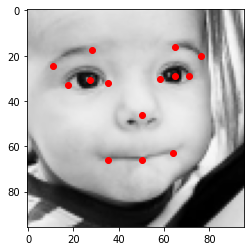

In [28]:
plt.plot(transformed_keypoints[:, 0], transformed_keypoints[:, 1], 'ro')
plt.imshow(transformed['image'], cmap='gray')

Преобразуем данные в необходимый нам формат и, соотвественно, скорректируем ключевые точки

In [29]:
PATH = 'C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\'

In [30]:
keypoints_train = []
images = []

for index in train.index:
    im = Image.open(PATH + train.loc[index]['filename'])
    image = np.array(im.convert('RGB'),'f')
    keypoints = train.iloc[index][keypoint_cols].values.reshape((14, 2))
    kps = np.array(keypoints)
    transformed = transform(image=image, keypoints=kps)
    transformed_image = transformed['image']
    transformed_keypoints = transformed['keypoints']
    transformed_keypoints = np.array(transformed_keypoints)
    
    images.append(transformed_image)
    keypoints_train.append(transformed_keypoints.reshape(1,28))
    

In [31]:
mistake = []
index_mistake = []
count = 0
for image in images:
    try:
        
        if image.shape[2] != 3:
            1
    except:
            count += 1
            mistake.append(image)
print(count)

0


In [32]:
len(mistake)

0

In [33]:
X = np.stack([images[i] for i in range(0,5000)])

In [34]:
X.shape

(5000, 96, 96, 3)

In [35]:
y = np.vstack(keypoints_train)

In [36]:
y.shape

(5000, 28)

In [37]:
X_train = X / 255.

# Построение модели Keras ¶
Построим модель Keras с данными. Прежде чем это сделаем, сначала сделаем некоторую предварительную обработку, используя конвейеры scikit-learn.

Идея конвейерной обработки заключается в том, что она позволяет легко отслеживать преобразования данных. Нам необходимо два масштабирования: один для входа и один для выхода. Поскольку мне не удалось заставить масштабирование работать с данными трехмерного изображения, мы будем использовать только конвейер для наших выходных данных.

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

y_train = output_pipe.fit_transform(y)

In [39]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D

In [40]:
from keras import optimizers

In [41]:
from keras.layers import Dropout, Flatten

In [46]:
model_1 = Sequential()
# input layer
model_1.add(BatchNormalization(input_shape=(96, 96, 3)))
model_1.add(Conv2D(24, (5, 5), kernel_initializer='he_normal'))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_1.add(Dropout(0.2))
# layer 2
model_1.add(Conv2D(36, (5, 5)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_1.add(Dropout(0.2))
# layer 3
model_1.add(Conv2D(48, (5, 5)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_1.add(Dropout(0.2))
# layer 4
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_1.add(Dropout(0.2))
# layer 5
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(Flatten())
# layer 6
model_1.add(Dense(500, activation="relu"))
# layer 7
model_1.add(Dense(90, activation="relu"))
# layer 8
model_1.add(Dense(28))

In [47]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 96, 96, 3)         12        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 92, 92, 24)        1824      
_________________________________________________________________
activation_10 (Activation)   (None, 92, 92, 24)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 46, 46, 24)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 46, 46, 24)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 42, 42, 36)        21636     
_________________________________________________________________
activation_11 (Activation)   (None, 42, 42, 36)       

In [48]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.95, nesterov=True)
model_1.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 200
history = model_1.fit(X_train, y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Epoch 1/200
200/200 [==============================] - 75s 362ms/step - loss: 0.0426 - accuracy: 0.7242 - val_loss: 0.0205 - val_accuracy: 0.8100
Epoch 2/200
200/200 [==============================] - 73s 364ms/step - loss: 0.0255 - accuracy: 0.8168 - val_loss: 0.0204 - val_accuracy: 0.8100
Epoch 3/200
200/200 [==============================] - 70s 352ms/step - loss: 0.0220 - accuracy: 0.8241 - val_loss: 0.0208 - val_accuracy: 0.8100
Epoch 4/200
200/200 [==============================] - 71s 353ms/step - loss: 0.0235 - accuracy: 0.8173 - val_loss: 0.0206 - val_accuracy: 0.8100
Epoch 5/200
200/200 [==============================] - 68s 340ms/step - loss: 0.0234 - accuracy: 0.8244 - val_loss: 0.0206 - val_accuracy: 0.8100
Epoch 6/200
200/200 [==============================] - 68s 338ms/step - loss: 0.0241 - accuracy: 0.8167 - val_loss: 0.0205 - val_accuracy: 0.8100
Epoch 7/200
200/200 [==============================] - 68s 340ms/step - loss: 0.0220 - accuracy: 0.8302 - val_loss: 0.0206 -

Epoch 57/200
200/200 [==============================] - 67s 335ms/step - loss: 0.0048 - accuracy: 0.8422 - val_loss: 0.0056 - val_accuracy: 0.8340
Epoch 58/200
200/200 [==============================] - 67s 335ms/step - loss: 0.0050 - accuracy: 0.8340 - val_loss: 0.0058 - val_accuracy: 0.8330
Epoch 59/200
200/200 [==============================] - 67s 335ms/step - loss: 0.0049 - accuracy: 0.8251 - val_loss: 0.0057 - val_accuracy: 0.8350
Epoch 60/200
200/200 [==============================] - 67s 334ms/step - loss: 0.0051 - accuracy: 0.8349 - val_loss: 0.0056 - val_accuracy: 0.8370
Epoch 61/200
200/200 [==============================] - 67s 335ms/step - loss: 0.0047 - accuracy: 0.8544 - val_loss: 0.0058 - val_accuracy: 0.8270
Epoch 62/200
200/200 [==============================] - 68s 342ms/step - loss: 0.0047 - accuracy: 0.8420 - val_loss: 0.0054 - val_accuracy: 0.8380
Epoch 63/200
200/200 [==============================] - 68s 339ms/step - loss: 0.0045 - accuracy: 0.8360 - val_loss: 0

200/200 [==============================] - 58s 288ms/step - loss: 0.0037 - accuracy: 0.8480 - val_loss: 0.0045 - val_accuracy: 0.8460
Epoch 113/200
200/200 [==============================] - 58s 288ms/step - loss: 0.0037 - accuracy: 0.8526 - val_loss: 0.0046 - val_accuracy: 0.8500
Epoch 114/200
200/200 [==============================] - 58s 288ms/step - loss: 0.0037 - accuracy: 0.8494 - val_loss: 0.0045 - val_accuracy: 0.8490
Epoch 115/200
200/200 [==============================] - 57s 286ms/step - loss: 0.0037 - accuracy: 0.8504 - val_loss: 0.0042 - val_accuracy: 0.8490
Epoch 116/200
200/200 [==============================] - 57s 285ms/step - loss: 0.0036 - accuracy: 0.8487 - val_loss: 0.0043 - val_accuracy: 0.8490
Epoch 117/200
200/200 [==============================] - 56s 280ms/step - loss: 0.0036 - accuracy: 0.8521 - val_loss: 0.0044 - val_accuracy: 0.8470
Epoch 118/200
200/200 [==============================] - 54s 268ms/step - loss: 0.0037 - accuracy: 0.8463 - val_loss: 0.0046 -

200/200 [==============================] - 53s 264ms/step - loss: 0.0033 - accuracy: 0.8474 - val_loss: 0.0044 - val_accuracy: 0.8570
Epoch 168/200
200/200 [==============================] - 53s 265ms/step - loss: 0.0033 - accuracy: 0.8620 - val_loss: 0.0043 - val_accuracy: 0.8490
Epoch 169/200
200/200 [==============================] - 53s 264ms/step - loss: 0.0033 - accuracy: 0.8577 - val_loss: 0.0041 - val_accuracy: 0.8530
Epoch 170/200
200/200 [==============================] - 53s 265ms/step - loss: 0.0033 - accuracy: 0.8513 - val_loss: 0.0041 - val_accuracy: 0.8540
Epoch 171/200
200/200 [==============================] - 53s 264ms/step - loss: 0.0033 - accuracy: 0.8570 - val_loss: 0.0042 - val_accuracy: 0.8510
Epoch 172/200
200/200 [==============================] - 53s 265ms/step - loss: 0.0033 - accuracy: 0.8541 - val_loss: 0.0041 - val_accuracy: 0.8570
Epoch 173/200
200/200 [==============================] - 53s 265ms/step - loss: 0.0033 - accuracy: 0.8477 - val_loss: 0.0042 -

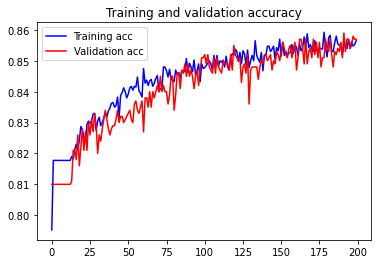

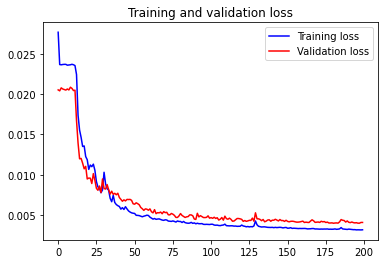

In [49]:
# Checking the plots.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

Вывод
------
Не видно серьезного переобучения. Поэтому спрогнозируем ключевые точки для тестового dataset

# Прогноз данных

In [50]:
PATH_TEST = 'C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\test\\'

In [51]:
transform_1 = albumentations.Compose([
    albumentations.Resize(96, 96, 3)
])

In [52]:
images_test = []

for path in data_test:
    im = Image.open(PATH_TEST + path)
    image = np.array(im.convert('RGB'),'f')
    transformed = transform_1(image=image)
    transformed_image = transformed['image']
    
    images_test.append(transformed_image)

In [53]:
X_test = np.stack([images_test[i] for i in range(0,len(images_test))])

In [54]:
X_test.shape

(1000, 96, 96, 3)

In [55]:
X_test = X_test / 255.

In [56]:
X_test[0].shape

(96, 96, 3)

In [57]:
predictions = model_1.predict(X_test)

In [58]:
predictions_conv = output_pipe.inverse_transform(predictions)

In [59]:
keypoints = []
index = 0

for path in data_test:
    im = Image.open(PATH_TEST + path)
    im = np.array(im.convert('RGB'),'f')
    size_image = im.shape
    transform_2 = albumentations.Compose([albumentations.Resize(size_image[0], size_image[1])
                                         ], keypoint_params=albumentations.KeypointParams(format='xy'))
    keypoint = predictions_conv[index]
    keypoint = keypoint.reshape((14, 2))
    image = X_test[index]
    transformed = transform_2(image=image, keypoints=keypoint)
    
    transformed_keypoints = transformed['keypoints']
    transformed_keypoints = np.array(transformed_keypoints)
    
    
    keypoints.append(transformed_keypoints.reshape(1,28))
    index += 1
    
    

In [60]:
k = np.around(keypoints[0].reshape((14,2)))
im = Image.open(PATH_TEST + '00008.jpg')

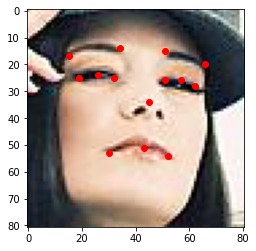

In [61]:
plt.plot(k[:, 0], k[:, 1], 'ro')
plt.imshow(im, cmap='gray')

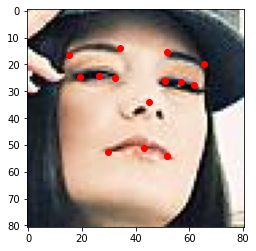

In [62]:
k = keypoints[0].reshape((14,2))
im = Image.open(PATH_TEST + '00008.jpg')
plt.plot(k[:, 0], k[:, 1], 'ro')
plt.imshow(im, cmap='gray')

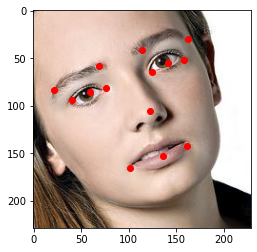

In [63]:
k = keypoints[1].reshape((14,2))
im = Image.open(PATH_TEST + '00014.jpg')
plt.plot(k[:, 0], k[:, 1], 'ro')
plt.imshow(im, cmap='gray')

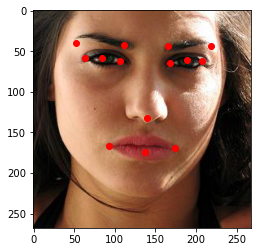

In [64]:
k = keypoints[2].reshape((14,2))
im = Image.open(PATH_TEST + '00015.jpg')
plt.plot(k[:, 0], k[:, 1], 'ro')
plt.imshow(im, cmap='gray')

In [65]:
data_test = pd.DataFrame(keypoints[0])

for index in range(1, len(keypoints)):
    data_test = pd.concat([data_test, pd.DataFrame(keypoints[index])], axis = 0)

In [66]:
data_test.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5',
                     'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11',
                     'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14']


In [67]:
data_test = data_test.reset_index().drop('index', axis = 1)

In [68]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   y1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   y2      1000 non-null   float64
 4   x3      1000 non-null   float64
 5   y3      1000 non-null   float64
 6   x4      1000 non-null   float64
 7   y4      1000 non-null   float64
 8   x5      1000 non-null   float64
 9   y5      1000 non-null   float64
 10  x6      1000 non-null   float64
 11  y6      1000 non-null   float64
 12  x7      1000 non-null   float64
 13  y7      1000 non-null   float64
 14  x8      1000 non-null   float64
 15  y8      1000 non-null   float64
 16  x9      1000 non-null   float64
 17  y9      1000 non-null   float64
 18  x10     1000 non-null   float64
 19  y10     1000 non-null   float64
 20  x11     1000 non-null   float64
 21  y11     1000 non-null   float64
 22  x

In [69]:
data_test.to_excel('data_test.xlsx', sheet_name='prediction')

Вывод:
-----
   1. В принцепе получилось, с учетом того, что я эту задачу решал впервые. За это слова отдельной благодарности за задание было интересно.
   2. Прогноз достаточно  есть явная ошибка и необходимо провести следующие улучшения:
       - увеличить число изображений для обучения;
       - использовать предобученную сеть.